In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random

### Original image

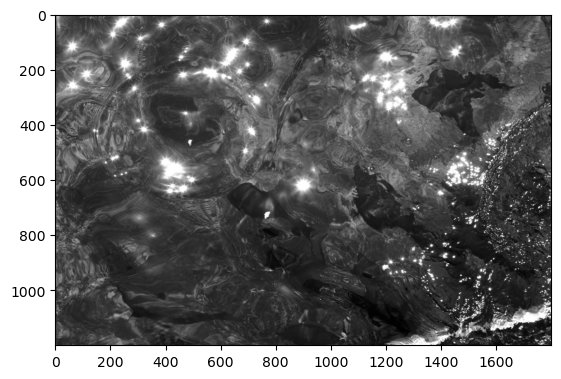

In [2]:
#读取原始图像并将其转换为灰度图
og_img = cv2.imread('C:\\Users\\Aurora\\Desktop\\Invisible-Digital-Watermarking-main\\img3.jpg', 0)
#将原始灰度图转换为RGB格式
og_img_color = cv2.cvtColor(og_img,cv2.COLOR_BGR2RGB)
#显示处理后的图像
plt.imshow(og_img_color)

### Water Mark

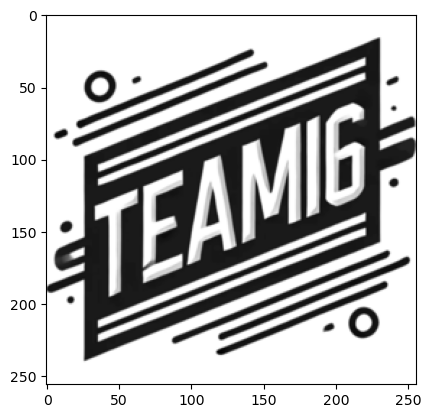

In [3]:
#读取原始水印图像并将其转换为灰度图
watermark_img = cv2.imread('C:\\Users\\Aurora\\Desktop\\Invisible-Digital-Watermarking-main\\watermark.png', 0)
#将原始灰度图转换为RGB格式
watermark_img_color = cv2.cvtColor(watermark_img,cv2.COLOR_BGR2RGB)
#显示处理后的图像
plt.imshow(watermark_img_color)

In [4]:
# Functions

In [5]:
#定义图像的宽和高
IMG_WIDTH = 1200
IMG_HEIGHT = 800
#定义水印的宽和高
WATERMARK_WIDTH = 256
WATERMARK_HEIGHT = 256
#计算图像的总像素数
IMG_SIZE = IMG_HEIGHT * IMG_WIDTH
#计算水印的总像素数
WATERMARK_SIZE = WATERMARK_HEIGHT * WATERMARK_WIDTH
#定义加密密钥
KEY = 564
#定义加密阈值
THRESH = 75
#定义异或函数，用于加密和解密
def xor(x ,y):
    if x == 0 and y == 0:
        return 0
    elif x == 0 and y != 0:
        return 255
    elif x != 0 and y == 0:
        return 255
    elif x !=0 and y != 0:
        return 0
#定义函数，用于计算指定像素的领域平均值
def mean_neighbour(img, x, y):
    val = 0
    num = 0
#遍历并累加领域像素值（总共考虑八个方向）
    i = x
    j = y
    if i >= 0 and i < IMG_HEIGHT and j >= 0 and j < IMG_WIDTH:
        val += img[i, j]
        num += 1
    i = x + 1
    j = y + 1
    if i >= 0 and i < IMG_HEIGHT and j >= 0 and j < IMG_WIDTH:
        val += img[i, j]
        num += 1
    i = x - 1
    j = y - 1
    if i >= 0 and i < IMG_HEIGHT and j >= 0 and j < IMG_WIDTH:
        val += img[i, j]
        num += 1
    i = x + 1
    j = y
    if i >= 0 and i < IMG_HEIGHT and j >= 0 and j < IMG_WIDTH:
        val += img[i, j]
        num += 1
    i = x
    j = y + 1
    if i >= 0 and i < IMG_HEIGHT and j >= 0 and j < IMG_WIDTH:
        val += img[i, j]
        num += 1
    i = x + 1
    j = y - 1
    if i >= 0 and i < IMG_HEIGHT and j >= 0 and j < IMG_WIDTH:
        val += img[i, j]
        num += 1
    i = x - 1
    j = y + 1
    if i >= 0 and i < IMG_HEIGHT and j >= 0 and j < IMG_WIDTH:
        val += img[i, j]
        num += 1
    i = x - 1
    j = y
    if i >= 0 and i < IMG_HEIGHT and j >= 0 and j < IMG_WIDTH:
        val = val + img[i, j]
        num += 1
    i = x
    j = y - 1
    if i >= 0 and i < IMG_HEIGHT and j >= 0 and j < IMG_WIDTH:
        val += img[i, j]
        num += 1
#返回平均值
    return val/float(num)

### Ownership Share Generation

True

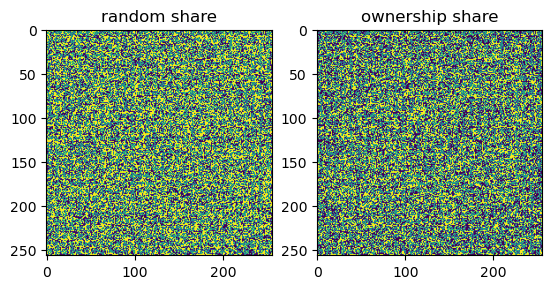

In [6]:
#将水印图像二值化
ret,watermark_img = cv2.threshold(watermark_img,127,255,cv2.THRESH_BINARY)
#初始化随机图像和所有者图像
random_img = np.zeros((WATERMARK_WIDTH, WATERMARK_HEIGHT, 1), np.uint8)
owner_img = np.zeros((WATERMARK_WIDTH, WATERMARK_HEIGHT, 1), np.uint8)
#使用密钥生成随机点
random.seed(a=KEY)
random_points = random.sample(range(IMG_SIZE), WATERMARK_SIZE)
#遍历随机点构建随机图像
i = 0
j = 0

for k in random_points:
    x = k // IMG_WIDTH
    y = k % IMG_WIDTH
    if mean_neighbour(og_img, x, y) > THRESH:
        random_img[i,j] = 255
    j += 1
    if j == 256:
        j = 0
        i += 1
#使用异或操作生成所有者图像
for i in range(0, WATERMARK_HEIGHT):
    for j in range(0, WATERMARK_WIDTH):
        owner_img[i, j] = xor(random_img[i, j], watermark_img[i, j])
#显示生成的随机图像
plt.subplot(1,2,1)
plt.title('random share')
plt.imshow(random_img)
#显示生成的所有者图像
plt.subplot(1,2,2)
plt.title('ownership share')
plt.imshow(owner_img)
#保存生成的图像
cv2.imwrite('C:\\Users\\Aurora\\Desktop\\Invisible-Digital-Watermarking-main\\master_img.jpg', random_img)
cv2.imwrite('C:\\Users\\Aurora\\Desktop\\Invisible-Digital-Watermarking-main\\owner_img.jpg', owner_img)

###  Random Share Generation - from modified images

In [7]:
#对修改过的图像进行处理
for cnt in range(1, 13):
#读取灰度模式的修改后的图像
    og_img = cv2.imread(f'C:\\Users\\Aurora\\Desktop\\Invisible-Digital-Watermarking-main\\modified_image_{cnt}.jpg', 0)
#如果图像读取失败，跳过当前循环并继续下一个
    if og_img is None:
        print(f"Error: Image {cnt} not found or failed to load.")
        continue 
#创建一个空的随机图像（随机水印图像）大小为256*256
    random_img = np.zeros((WATERMARK_WIDTH, WATERMARK_HEIGHT, 1), np.uint8)
#初始化i和j控制随机图像的坐标
    i = 0
    j = 0
#遍历随机点列表
    for k in random_points:
        x = k // IMG_WIDTH #计算x坐标
        y = k % IMG_WIDTH #计算y坐标
#如果领域平均值大于阈值THRESH，则将该点设置为白色（255）
        if mean_neighbour(og_img, x, y) > THRESH:
            random_img[i, j] = 255
        j += 1
#如果j达到256则重置j并增加i
        if j == 256:
            j = 0
            i += 1
#保存每张处理后随机水印的图像
    cv2.imwrite(f'C:\\Users\\Aurora\\Desktop\\Invisible-Digital-Watermarking-main\\master_img_{cnt}.jpg', random_img)
    print(cnt) #输出当前计数
#成功完成的指令
print("Done")


1
2
3
4
5
6
7
8
9
10
11
12
Done


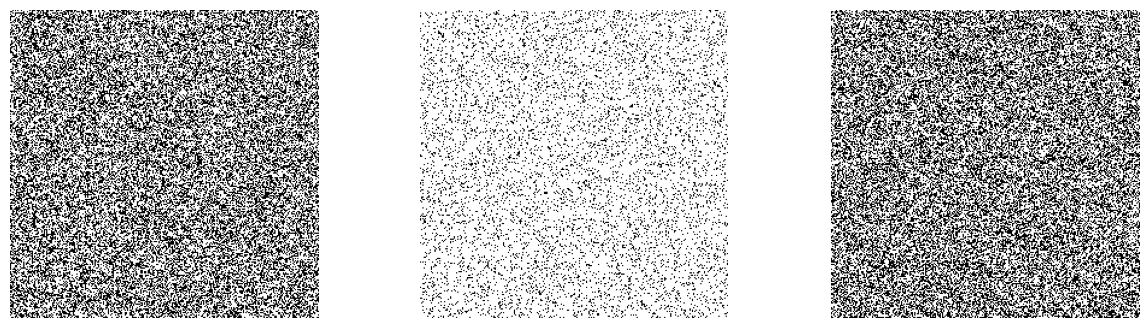

In [8]:
#创建一个包含1行3列子图的图像容器
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))

for cnt in range(0, 3):
#读取随机生成的水印图像图像
    rand_img = cv2.imread(f'C:\\Users\\Aurora\\Desktop\\Invisible-Digital-Watermarking-main\\master_img_{cnt}.jpg', 0)
    
#检查图像是否成功读取
    if rand_img is None:
        print(f"Error: Image master_img_{cnt}.jpg not found or failed to load.")
        continue  #如果图像读取失败，跳过该循环

#将图像转换为无符号8位整数格式，确保图像格式正确
    rand_img = np.array(rand_img, dtype=np.uint8)

#显示图像并设置颜色映射为灰度
    axes[cnt].imshow(rand_img, cmap='gray')
    axes[cnt].axis('off')  #关闭坐标轴

plt.show()


### Watermark Extractor

Done


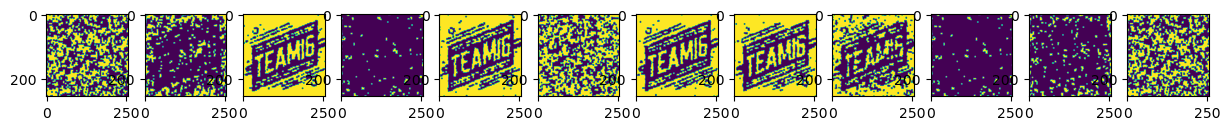

In [9]:
#使用指定的KEY作为随机数生成器的种子
random.seed(a=KEY)
#从0到IMG_SIZE中随机采样WATERMARK_SIZE个点
random_points = random.sample(range(IMG_SIZE), WATERMARK_SIZE)
#创建一个包含1行9列子图的容器并且宽为15高为5
fig, axes = plt.subplots(nrows=1, ncols=12, figsize=(15, 5))
#读取所有者图像
owner_img = cv2.imread('C:\\Users\\Aurora\\Desktop\\Invisible-Digital-Watermarking-main\\owner_img.jpg', 0)

for k in range(0, 12):
#读取水印图像
    rand_img = cv2.imread('C:\\Users\\Aurora\\Desktop\\Invisible-Digital-Watermarking-main\\master_img_'+str(k)+'.jpg', 0)
#创建空白水印图像
    watermark_img = np.zeros((WATERMARK_WIDTH, WATERMARK_HEIGHT, 1), np.uint8)
#使用异或操作生成水印图像
    i = 0
    j = 0

    for i in range(0, WATERMARK_HEIGHT):
        for j in range(0, WATERMARK_WIDTH):
            watermark_img[i, j] = xor(rand_img[i, j], owner_img[i, j])
#对水印图像进行图像处理
    watermark_img = (255-watermark_img)
    kernel = np.ones((4,4),np.uint8)
    watermark_img = cv2.medianBlur(watermark_img, 3) #中值滤波
    watermark_img = cv2.morphologyEx(watermark_img, cv2.MORPH_OPEN, kernel) #开运算
    watermark_img = cv2.morphologyEx(watermark_img, cv2.MORPH_CLOSE, kernel) #闭运算
    watermark_img = (255-watermark_img)
#保存处理后的水印图像
    cv2.imwrite(r'C:\\Users\\Aurora\\Desktop\\Invisible-Digital-Watermarking-main\\watermark_img_'+str(k)+'.jpg', watermark_img)
    axes[k].imshow(watermark_img)
    #print (k)
print ("Done")

#### Accuracy of extracted watermark 

In [10]:
#读取原始水印模板
template = cv2.imread('C:\\Users\\Aurora\\Desktop\\Invisible-Digital-Watermarking-main\\watermark.png', 0)

for k in range(1, 12):
#读取水印图像
    img_gray = cv2.imread(r'C:\\Users\\Aurora\\Desktop\\Invisible-Digital-Watermarking-main\\watermark_img_'+str(k)+'.jpg', 0)
#模板匹配并放大结果
    res = cv2.matchTemplate(img_gray,template,cv2.TM_CCOEFF_NORMED)*100+43
    print(res)


[[72.522385]]
[[99.70956]]
[[54.980705]]
[[97.75507]]
[[49.339127]]
[[99.73237]]
[[99.630646]]
[[89.565475]]
[[54.980705]]
[[61.24424]]
[[40.100517]]


In [11]:
#定义函数用于通过对比已被数字水印处理过后的图像和对应的水印图像来评估水印嵌入防伪的准确性
def imageVSwatermark_accuracy(image_index):
    img = cv2.imread(r'C:\\Users\\Aurora\\Desktop\\Invisible-Digital-Watermarking-main\\modified_image_'+str(image_index)+'.jpg', 0)
    img_wm = cv2.imread(r'C:\\Users\\Aurora\\Desktop\\Invisible-Digital-Watermarking-main\\watermark_img_'+str(image_index)+'.jpg', 0)
#使用模板匹配计算相似值并放大结果
    res = cv2.matchTemplate(img_wm,template,cv2.TM_CCOEFF_NORMED)*100+40
#如果相似值大于60
    if res[[0]] >60:
        plt.figure(figsize = (10,7))
        plt.subplot(2,2,1)
        plt.imshow(img)
        plt.title('Modified image of the original image')
        plt.axis('off')
#如果相似度小于或等于60
    elif res[[0]] <= 60:
        plt.figure(figsize = (10,7))
        plt.subplot(2,2,1)
        plt.imshow(img)
        plt.title('Not related to the original image') 
        plt.axis('off')


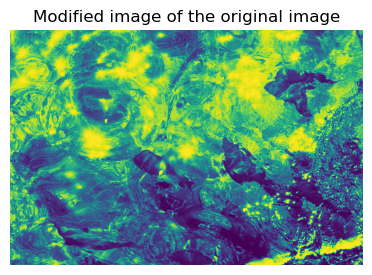

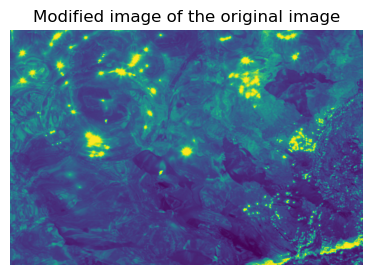

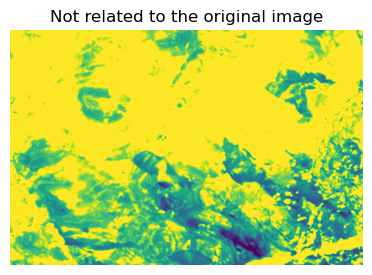

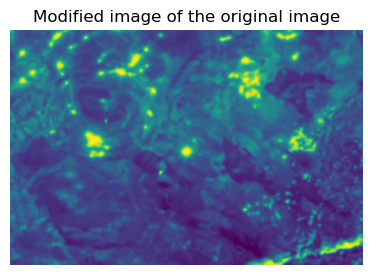

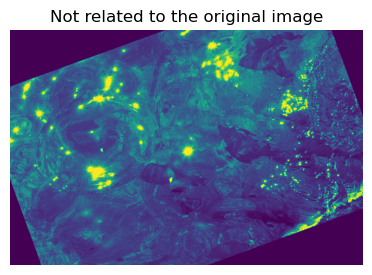

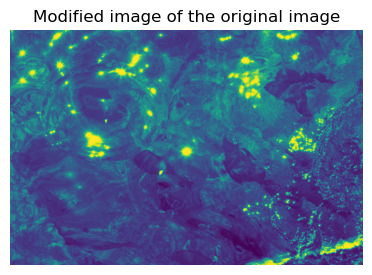

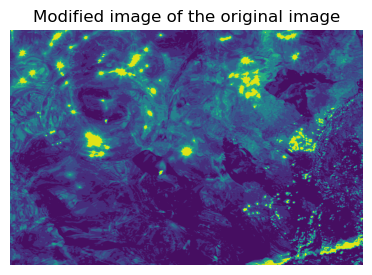

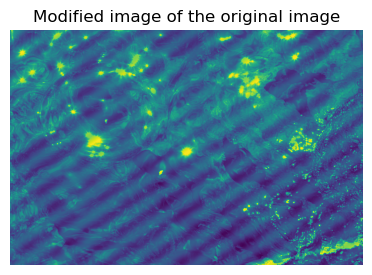

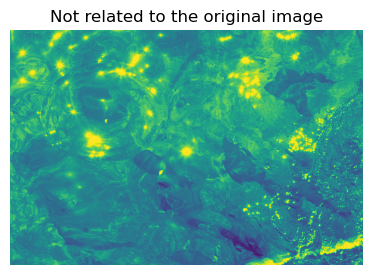

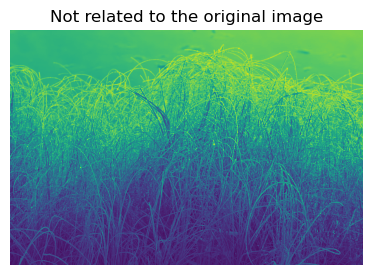

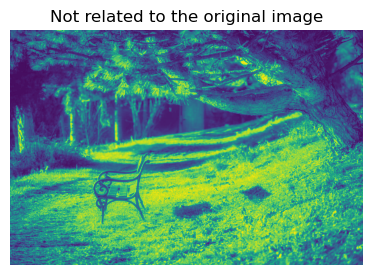

In [12]:
#遍历1到12号图像并调用函数
for i in range(1,12):
    imageVSwatermark_accuracy(i)

70.01727163791656
96.96210265159607
52.54647821187973
95.10651469230652
46.33912682533264
96.98022842407227
96.6306471824646
86.56547904014587
52.54647821187973
58.58309656381607
43.8838192820549


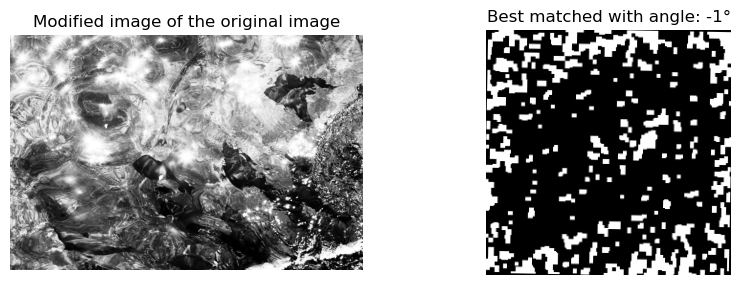

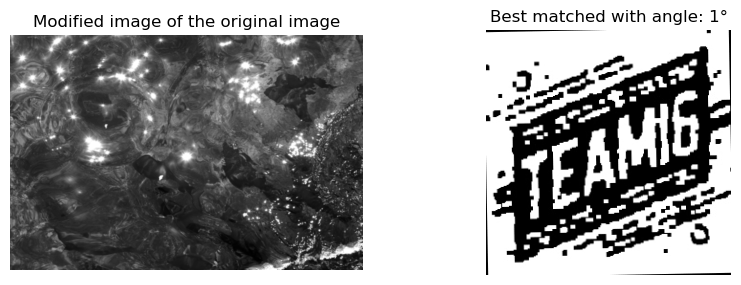

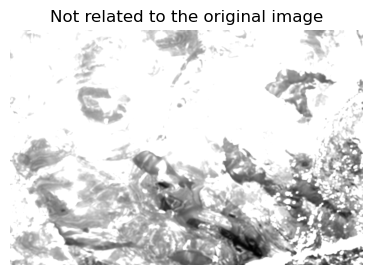

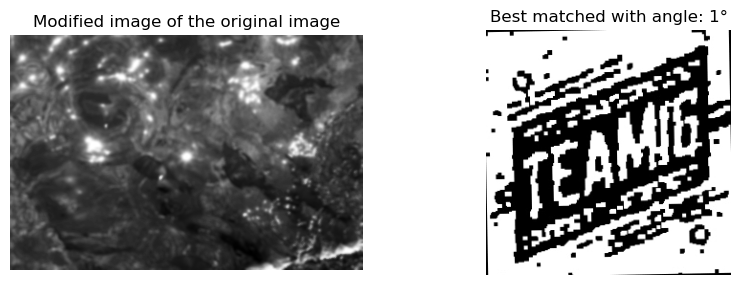

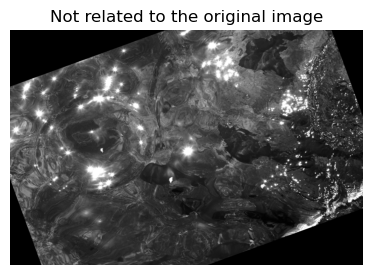

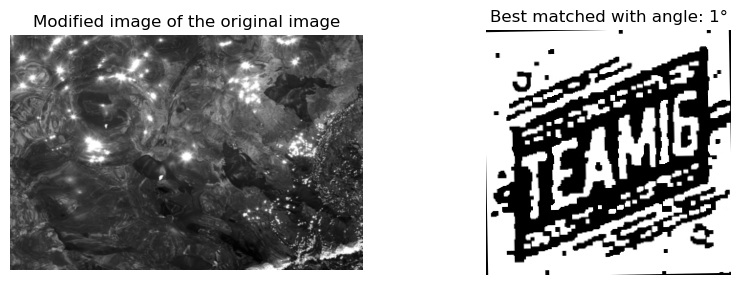

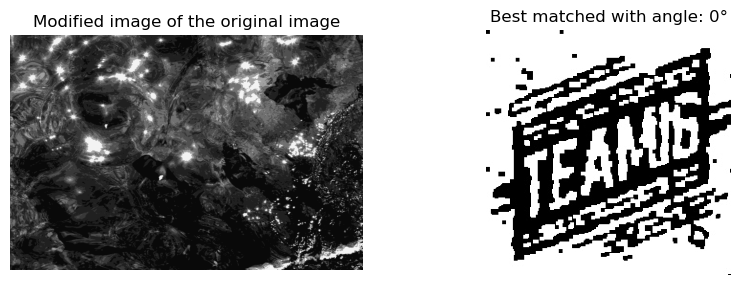

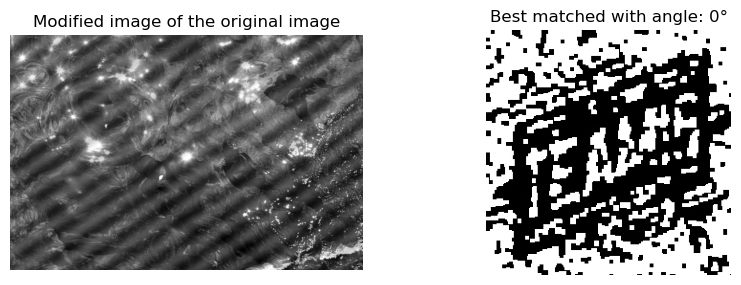

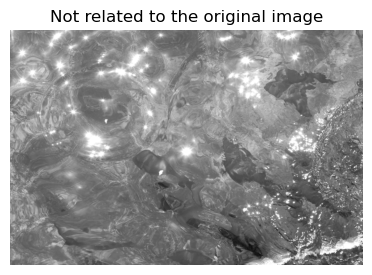

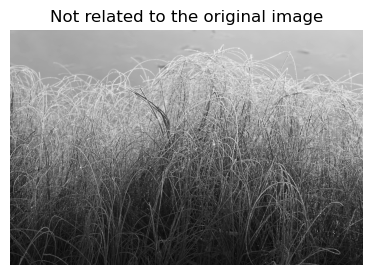

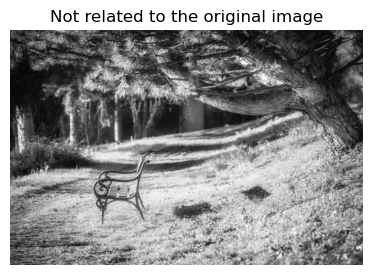

In [13]:
#读取原始水印模板
template = cv2.imread('C:\\Users\\Aurora\\Desktop\\Invisible-Digital-Watermarking-main\\watermark.png', 0)

#定义旋转匹配函数
def rotate_and_match(img, template, angle_range=45, step=1):
    best_score = 0
    best_angle = 0
    h, w = img.shape[:2]
    
    for angle in range(-angle_range, angle_range + 1, step):
        #获取旋转矩阵
        center = (w // 2, h // 2)
        M = cv2.getRotationMatrix2D(center, angle, 1.0)
        rotated = cv2.warpAffine(img, M, (w, h))

        #使用模板匹配
        res = cv2.matchTemplate(rotated, template, cv2.TM_CCOEFF_NORMED)
        _, max_val, _, _ = cv2.minMaxLoc(res)

        #找到更好的匹配
        if max_val > best_score:
            best_score = max_val
            best_angle = angle

    return best_angle, best_score

# 定义函数用于评估水印嵌入防伪的准确性
def imageVSwatermark_accuracy(image_index):
    img = cv2.imread(r'C:\\Users\\Aurora\\Desktop\\Invisible-Digital-Watermarking-main\\modified_image_' + str(image_index) + '.jpg', 0)
    img_wm = cv2.imread(r'C:\\Users\\Aurora\\Desktop\\Invisible-Digital-Watermarking-main\\watermark_img_' + str(image_index) + '.jpg', 0)

    # 使用旋转匹配来提高匹配的有效性
    angle_range = 90  # 可调整的角度范围
    best_angle, best_score = rotate_and_match(img_wm, template, angle_range)
    score=best_score*100+40
    print(score)
    
    #输出匹配结果
    if score > 60:  # 相似值判断是否大于60
        plt.figure(figsize=(10, 7))
        plt.subplot(2, 2, 1)
        plt.imshow(img, cmap='gray')
        plt.title('Modified image of the original image')
        plt.axis('off')
        plt.subplot(2, 2, 2)
        plt.imshow(cv2.warpAffine(img_wm, cv2.getRotationMatrix2D((img_wm.shape[1] // 2, img_wm.shape[0] // 2), best_angle, 1.0), (img_wm.shape[1], img_wm.shape[0])), cmap='gray')
        plt.title(f'Best matched with angle: {best_angle}°')
        plt.axis('off')
    else:
        plt.figure(figsize=(10, 7))
        plt.subplot(2, 2, 1)
        plt.imshow(img, cmap='gray')
        plt.title('Not related to the original image')
        plt.axis('off')

# 遍历1到12号图像并调用函数
for i in range(1, 12):
    imageVSwatermark_accuracy(i)
